    -------------------- About Leads and Data Set --------------------
    
         X Education aims to improve its lead conversion rate, which is currently around 30%. The company receives numerous leads daily through various channels, including their website and referrals. However, only a fraction of these leads convert into sales. To enhance efficiency, X Education wants to identify "Hot Leads"—the most promising prospects among the leads they acquire. By focusing their sales team's efforts on these high-potential leads, the company hopes to increase its conversion rate. This targeted approach should help streamline their sales process, reduce wasted efforts, and ultimately boost the success rate of their lead conversion efforts.

<img src="filter.jpg">

    -------------------- About Data --------------------
    1. Prospect ID 
            A unique ID with which the customer is identified.
    2. Lead Number	
            A lead number assigned to each lead procured.
    3. Lead Origin	
            The origin identifier with which the customer was identified to be a lead. Includes API, 
            Landing Page Submission, etc.
    4. Lead Source	
            The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
    5. Do Not Email
            An indicator variable selected by the customer wherein they select whether of not they want to be emailed 
            about the course or not.
    6.Do Not Call
            An indicator variable selected by the customer wherein they select whether of not they want to be called about
            the course or not.
    7. Converted
            The target variable. Indicates whether a lead has been successfully converted or not.
    8. TotalVisits
            The total number of visits made by the customer on the website.
    9. Total Time Spent on Website	
            The total time spent by the customer on the website.
    10. Page Views Per Visit
            Average number of pages on the website viewed during the visits.
    11. Last Activity 
            Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
    12. Country 
            The country of the customer.
    13. Specialization
            Industry domain in which the customer worked before. Includes the level 'Select Specialization' which means 
            the customer had not selected this option while filling the form.
    14. How did you hear about X Education
            The source from which the customer heard about X Education.
    15. What is your current occupation	
            Indicates whether the customer is a student, umemployed or employed.
    16. What matters most to you in choosing this course
            An option selected by the customer indicating what is their main motto behind doing this course.
    17. Search
    18. Magazine	
    19. Newspaper Article	
    20. X Education Forums	
    21. Newspaper
    22. Digital Advertisement	
            Indicating whether the customer had seen the ad in any of the listed items.
    23. Through Recommendations	
            Indicates whether the customer came in through recommendations.
    24. Receive More Updates About Our Courses
            Indicates whether the customer chose to receive more updates about the courses.
    25. Tags
            Tags assigned to customers indicating the current status of the lead.
    26. Lead Quality
            Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
    27. Update me on Supply Chain Content
            Indicates whether the customer wants updates on the Supply Chain Content.
    28. Get updates on DM Content
            Indicates whether the customer wants updates on the DM Content.
    29. Lead Profile
            A lead level assigned to each customer based on their profile.
    30. City 
            The city of the customer.
    31. Asymmetrique Activity Index
    32. Asymmetrique Profile Index	
    33. Asymmetrique Activity Score	
    34. Asymmetrique Profile Score	
                An index and score assigned to each customer based on their activity and their profile
    35. I agree to pay the amount through cheque	
            Indicates whether the customer has agreed to pay the amount through cheque or not.
    36. a free copy of Mastering The Interview	
            Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
    37. Last Notable Activity
            The last notable acitivity performed by the student.

##### Importing Dataset and Required Libraries for Classification Problem Statement.

In [1]:
import numpy as np, pandas as pd     # For managing the Datset.
import matplotlib.pyplot as plt, seaborn as sns # Visualization libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report  # Model libraries to train and get predicted values. 

import warnings
warnings.filterwarnings('ignore') # Not so much useful just to ignore error.

In [2]:
pd.set_option('display.max.rows',100)
pd.set_option('display.max.columns',100)
pd.set_option('float_format', '{:.2f}'.format)

    Examine the DataSet

In [3]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


    As there are some noise in the Dataset as because :-
        - We have some NULL values im moreover features and Columns.
        - AS there are 40% to 50% noise in some columns so we have to treat it
        - Another task is there are some cell or data with is said as SELECT which the user won't decided
        - Feature Selection is also the best method so we hae to select it as per our need.
    
    Some Required points to do here is :
        1. Problem statement - define input and output variables    ✓ 
        2. Data gathering (read the data)                           ✓ 
        3. Exploratory data analysis(EDA)                           ✓ 
            1. Univariate, Bivariate, Multivariate Analysis
            2. Missing values handling
            3. Datatype of columns(Encoding)
            4. Outliers handling
            5. Skewness
            6. Scaling
        4. Feature engineering and selection
        5. Model trainingand evaluation

##### Exploratory Data Analysis (EDA)

##### Data Cleaning !

    1. Handling the SELECT cell as because the customer didn't select any statement, 
       So, Changing the SELECT values to NULL so that we can see all null values together.

In [7]:
lead[lead == 'Select'] = np.NaN

In [8]:
count = lead.isnull().sum()
percen = count / len(lead) * 100

count.sort_values(ascending = False)
percen.sort_values(ascending = False)

df_null = pd.DataFrame({
    'column name' : lead.columns,
    'total count' : count,
    'percentage' : percen
})

df_null.reset_index(drop = True, inplace = True)
df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
df_filtered

,column name,total count,percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


In [9]:
drop_col = df_null.loc[df_null['percentage'] > 40.00, 'column name']
lead.drop(columns = drop_col, inplace = True)

In [10]:
count = lead.isnull().sum()
percen = count / len(lead) * 100

count.sort_values(ascending = False)
percen.sort_values(ascending = False)

df_null = pd.DataFrame({
    'column name' : lead.columns,
    'total count' : count,
    'percentage' : percen
})

df_null.reset_index(drop = True, inplace = True)
df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
df_filtered

,column name,total count,percentage
26,City,3669,39.71
12,Specialization,3380,36.58
23,Tags,3353,36.29
14,What matters most to you in choosing a course,2709,29.32
13,What is your current occupation,2690,29.11
11,Country,2461,26.63
9,Page Views Per Visit,137,1.48
7,TotalVisits,137,1.48
10,Last Activity,103,1.11
3,Lead Source,36,0.39


    Checking the Null values to fill or to impute it.
    
    - City               39%
    - Specialization     36%

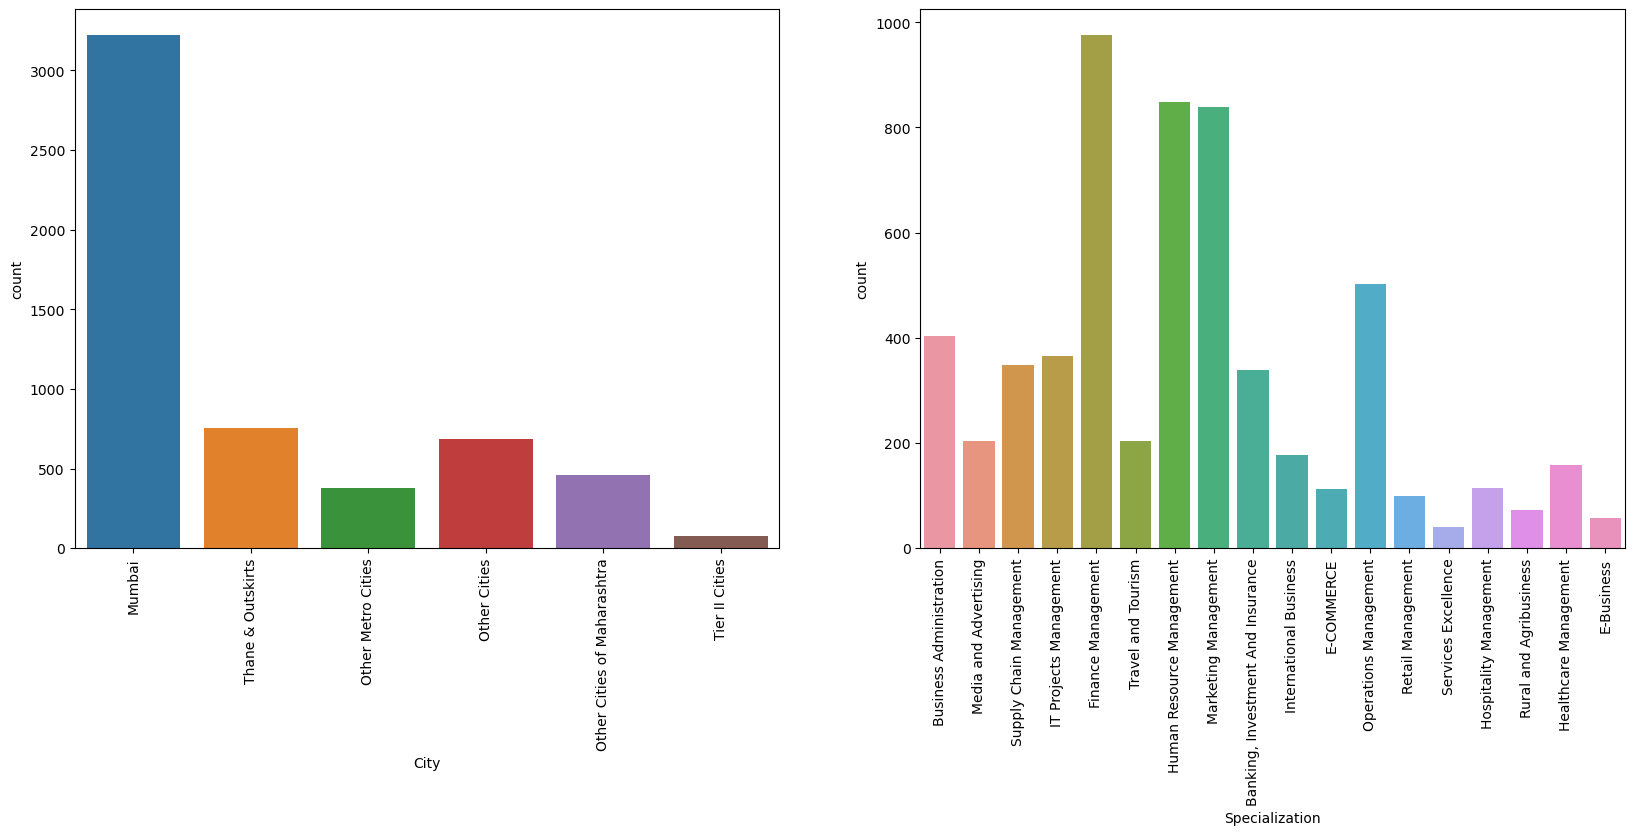

In [11]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = lead, x = 'City')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = lead, x = 'Specialization')
plt.xticks(rotation = 90)
plt.show()

In [12]:
round(lead['City'].value_counts(normalize=True),2) * 100

City
Mumbai                        58.00
Thane & Outskirts             13.00
Other Cities                  12.00
Other Cities of Maharashtra    8.00
Other Metro Cities             7.00
Tier II Cities                 1.00
Name: proportion, dtype: float64

In [13]:
round(lead['Specialization'].value_counts(normalize=True),2)*100

Specialization
Finance Management                  17.00
Human Resource Management           14.00
Marketing Management                14.00
Operations Management                9.00
Business Administration              7.00
IT Projects Management               6.00
Supply Chain Management              6.00
Banking, Investment And Insurance    6.00
Travel and Tourism                   3.00
Media and Advertising                3.00
International Business               3.00
Healthcare Management                3.00
Hospitality Management               2.00
E-COMMERCE                           2.00
Retail Management                    2.00
Rural and Agribusiness               1.00
E-Business                           1.00
Services Excellence                  1.00
Name: proportion, dtype: float64

    As City has some NaN values and most of the data in city is Mumbai So can impute by mumbai
    Another the Specialization can be others.
        Whenever we fill NaN values we assumne but in Specialization we have equal values, so impute by Others

In [14]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

    Checking the Null values to fill or to impute it.
    
    - Tags                                               36%
    - What matters most to you in choosing a course	     29%

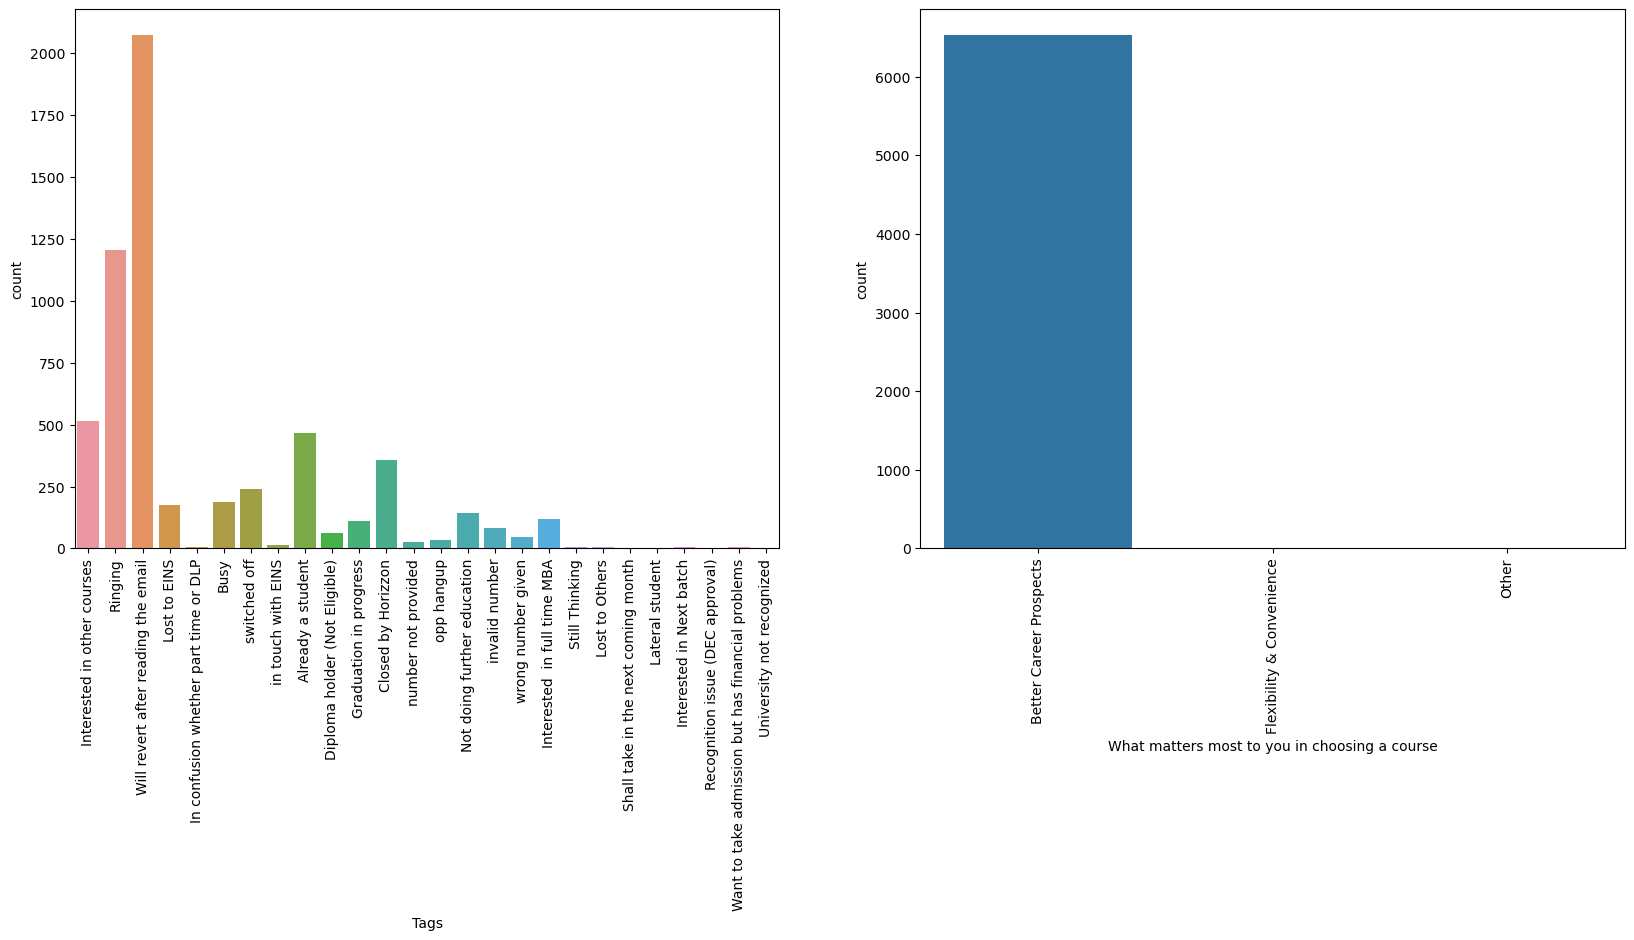

In [15]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = lead, x = 'Tags')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = lead, x = 'What matters most to you in choosing a course')
plt.xticks(rotation = 90)
plt.show()

In [16]:
round(lead['Tags'].value_counts(normalize=True),2) * 100

Tags
Will revert after reading the email                 35.00
Ringing                                             20.00
Interested in other courses                          9.00
Already a student                                    8.00
Closed by Horizzon                                   6.00
switched off                                         4.00
Busy                                                 3.00
Lost to EINS                                         3.00
Not doing further education                          2.00
Interested  in full time MBA                         2.00
Graduation in progress                               2.00
invalid number                                       1.00
Diploma holder (Not Eligible)                        1.00
wrong number given                                   1.00
opp hangup                                           1.00
number not provided                                  0.00
in touch with EINS                                   0.00
Lost to O

In [17]:
round(lead['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects     100.00
Flexibility & Convenience     0.00
Other                         0.00
Name: proportion, dtype: float64

    As Tags has some NaN values and most of the data in city is Mumbai So can impute by 
        Will revert after reading the email
    Another the What matters most to you in choosing a course.
        Whenever we fill NaN values we check the visual but here the value are same so i decided to drop it.

In [18]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')
lead.drop('What matters most to you in choosing a course', inplace = True, axis = 1)

    Checking the Null values to fill or to impute it.
    
    - What is your current occupation    29%
    - Country                      	     26%

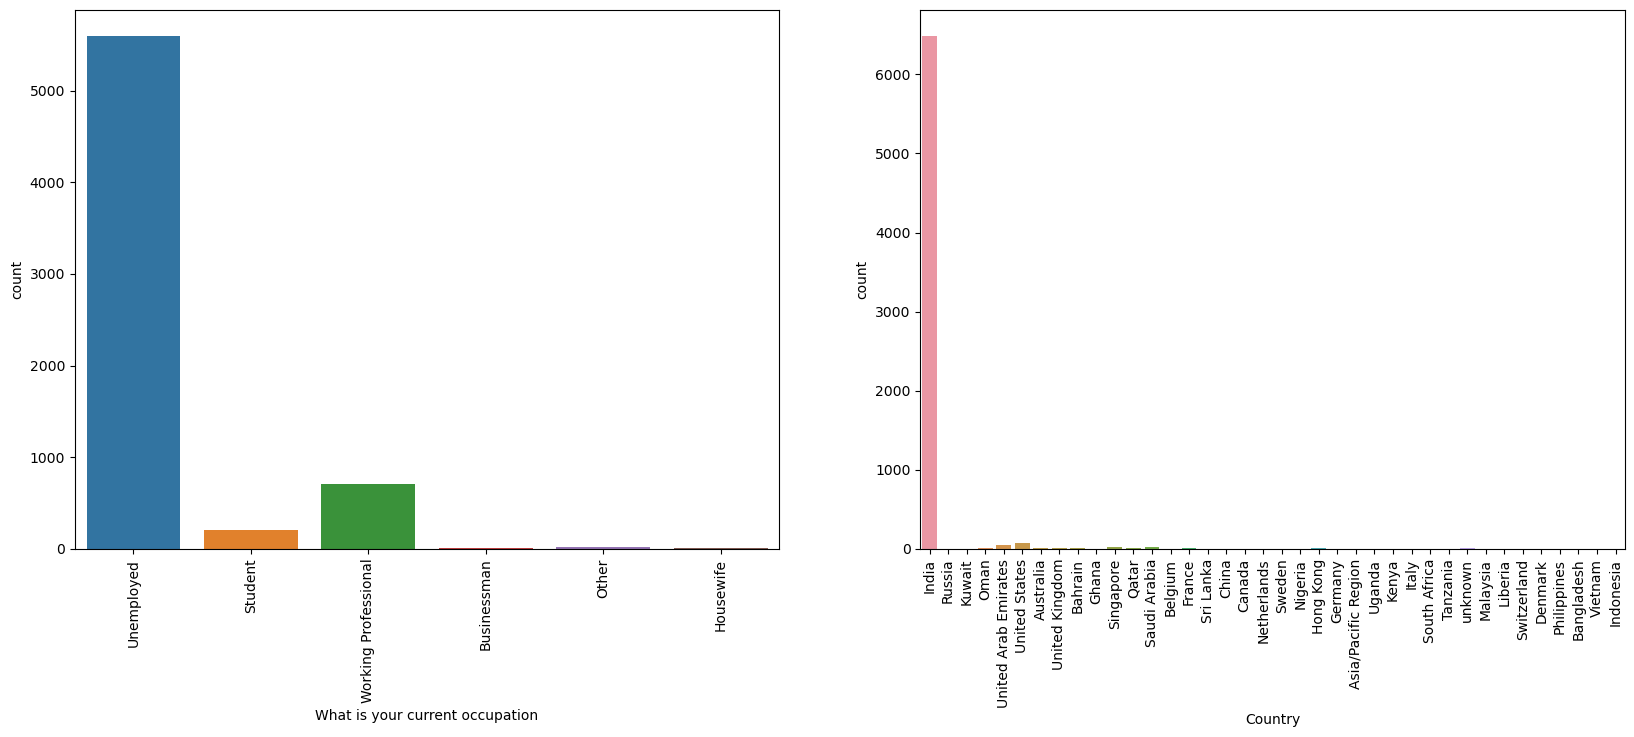

In [19]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = lead, x = 'What is your current occupation')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = lead, x = 'Country')
plt.xticks(rotation = 90)
plt.show()

In [20]:
round(lead['What is your current occupation'].value_counts(normalize=True),2) * 100

What is your current occupation
Unemployed             85.00
Working Professional   11.00
Student                 3.00
Other                   0.00
Housewife               0.00
Businessman             0.00
Name: proportion, dtype: float64

In [21]:
round(lead['Country'].value_counts(normalize=True),2) * 100

Country
India                  96.00
United States           1.00
United Arab Emirates    1.00
Singapore               0.00
Saudi Arabia            0.00
United Kingdom          0.00
Australia               0.00
Qatar                   0.00
Hong Kong               0.00
Bahrain                 0.00
Oman                    0.00
France                  0.00
unknown                 0.00
South Africa            0.00
Nigeria                 0.00
Germany                 0.00
Kuwait                  0.00
Canada                  0.00
Sweden                  0.00
China                   0.00
Asia/Pacific Region     0.00
Uganda                  0.00
Bangladesh              0.00
Italy                   0.00
Belgium                 0.00
Netherlands             0.00
Ghana                   0.00
Philippines             0.00
Russia                  0.00
Switzerland             0.00
Vietnam                 0.00
Denmark                 0.00
Tanzania                0.00
Liberia                 0.00
Malays

    As What is your current occupation has some NaN values and most of the data is Unemployed So can impute by Unemployed
    Another in Country we have to fill NaN values by the India as it may be important to us.

In [22]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [23]:
# lead['Page Views Per Visit'] = lead['Page Views Per Visit'].astype('int')
# lead['TotalVisits'] = lead['TotalVisits'].astype('int')

# plt.figure(figsize=[20, 7])
# plt.subplot(1, 2, 1)
# sns.boxplot(data = lead, x = 'Page Views Per Visit')
# plt.title('Box Plot of Page Views Per Visit')
# plt.subplot(1, 2, 2)
# sns.boxplot(data=lead, x='TotalVisits')
# plt.title('Box Plot of Total Visits')
# plt.show()

    At Last there are some columns which are less then 2% NULL values and maybe it be useful for us so imputing or dropping the values here.

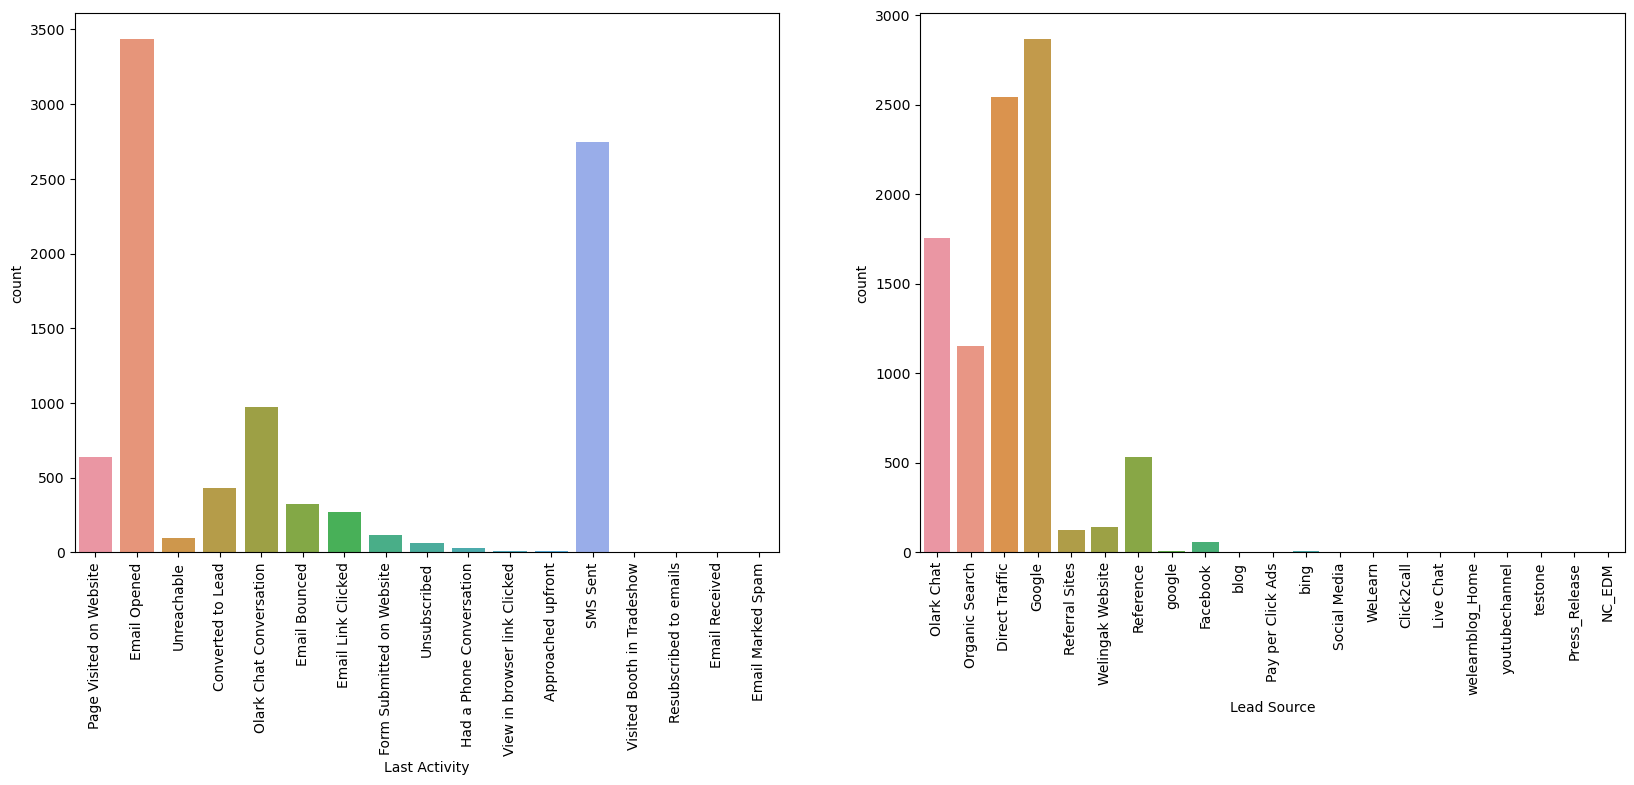

In [24]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = lead, x = 'Last Activity')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = lead, x = 'Lead Source')
plt.xticks(rotation = 90)
plt.show()

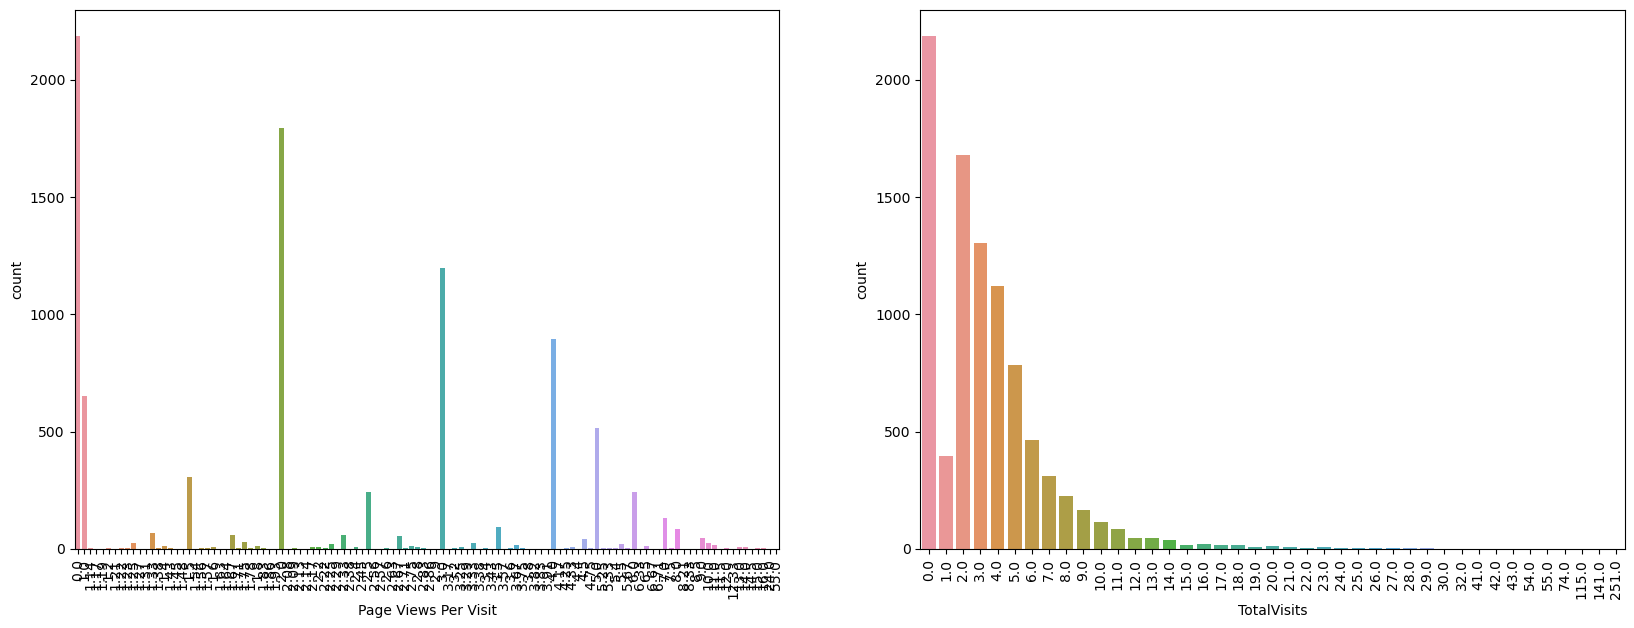

In [25]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = lead, x = 'Page Views Per Visit')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = lead, x = 'TotalVisits')
plt.xticks(rotation = 90)
plt.show()

In [26]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan, '0.0')
lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, '0.0')

In [27]:
count = lead.isnull().sum()
percen = count / len(lead) * 100

count.sort_values(ascending = False)
percen.sort_values(ascending = False)

df_null = pd.DataFrame({
    'column name' : lead.columns,
    'total count' : count,
    'percentage' : percen
})

df_null.reset_index(drop = True, inplace = True)
df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
df_filtered

,column name,total count,percentage


In [28]:
lead.duplicated().sum()

0

    Now it maybe cleaned now we can do analysis on basis of our work.

##### EDA - Univariate and Bivarite Analysis.

In [29]:
# lead.drop('Page Views Per Visit\t', axis = 1, inplace = True)

In [30]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9240 non-null   object
 1   Lead Number                               9240 non-null   int64 
 2   Lead Origin                               9240 non-null   object
 3   Lead Source                               9240 non-null   object
 4   Do Not Email                              9240 non-null   object
 5   Do Not Call                               9240 non-null   object
 6   Converted                                 9240 non-null   int64 
 7   TotalVisits                               9240 non-null   object
 8   Total Time Spent on Website               9240 non-null   int64 
 9   Page Views Per Visit                      9240 non-null   object
 10  Last Activity                             9240 n

    Converted - As converted is our target variable and we have to get values by the help of 
                other columns and features.

In [32]:
for col in lead.columns :
    if lead[col].dtype == object:
        print(lead[col].value_counts())
        print(50*'_')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__________________________________________________
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites    

`A Function for Categorical values to get Data`

In [33]:
def plot_categorical_distributions(column) :
    activity_counts = lead[column].value_counts()

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)    # Bar Plot Helps to create some bar to represent the data value
    sns.barplot(
        x = activity_counts.index, 
        y = activity_counts.values, 
        palette = 'viridis'
    )
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation = 45)

    plt.subplot(1, 2, 2)    # Pie Chart Helps to create some bar to represent the data value
    plt.pie(
        activity_counts, 
        labels = activity_counts.index, 
        autopct = '%1.1f%%', 
        colors = sns.color_palette('viridis', len(activity_counts)))
    plt.title(f'Pie Chart of {column}')
    plt.tight_layout()
    plt.show()

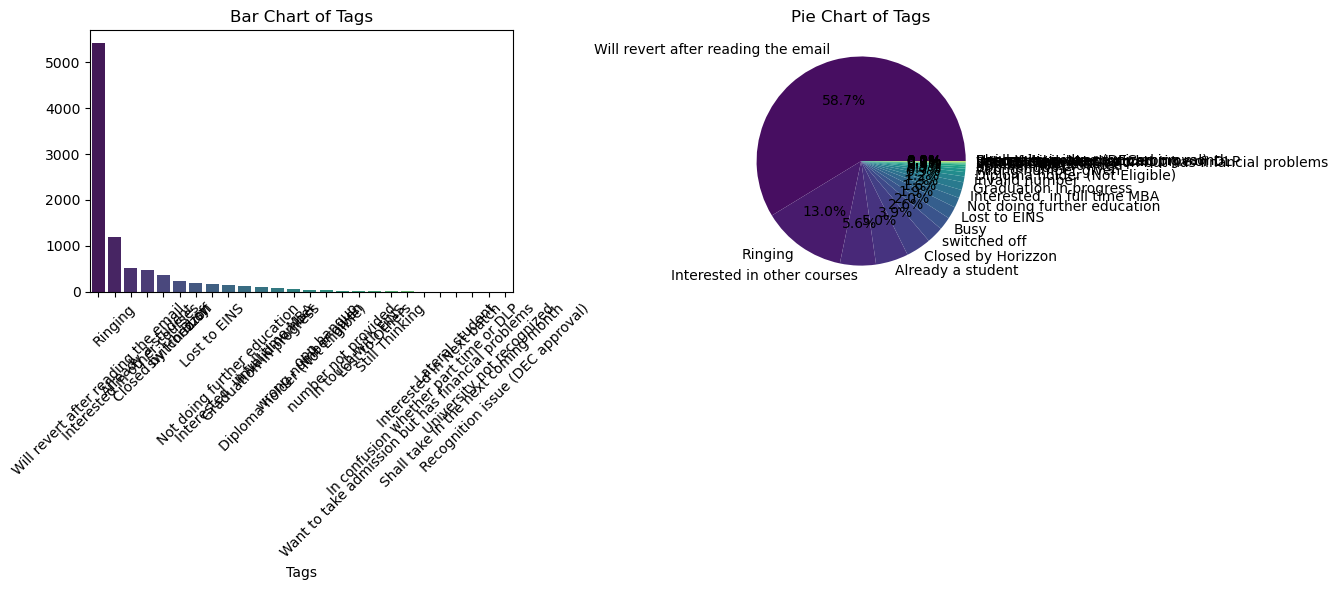

In [34]:
plot_categorical_distributions('Tags')

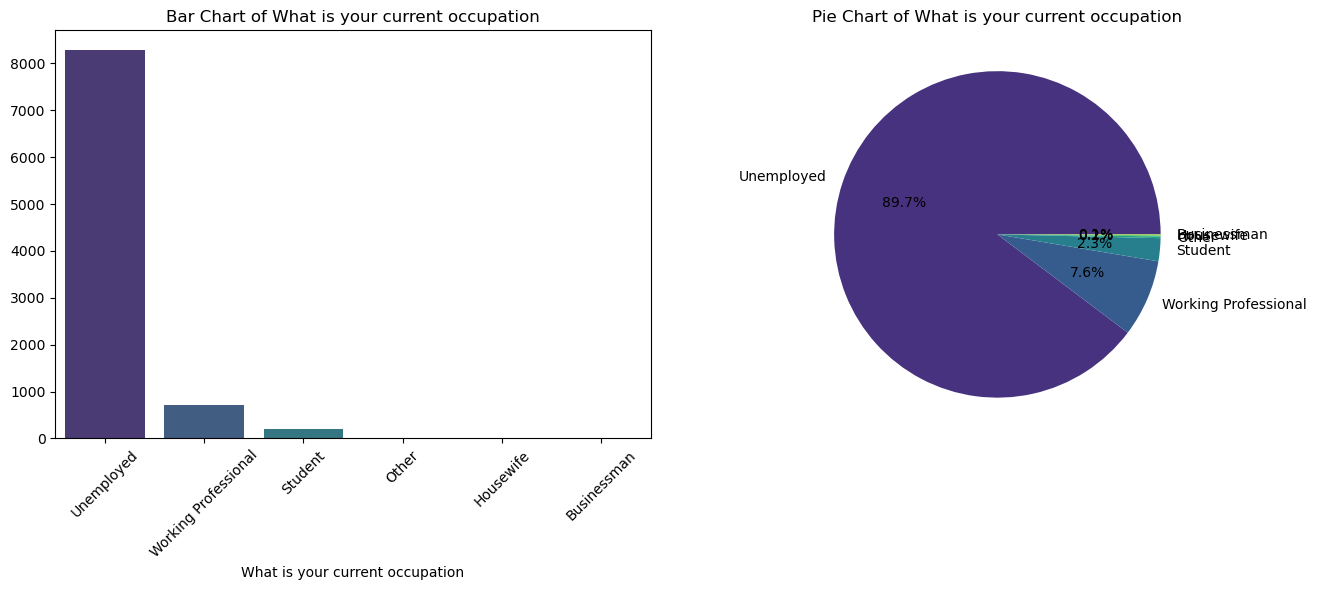

In [35]:
plot_categorical_distributions('What is your current occupation')

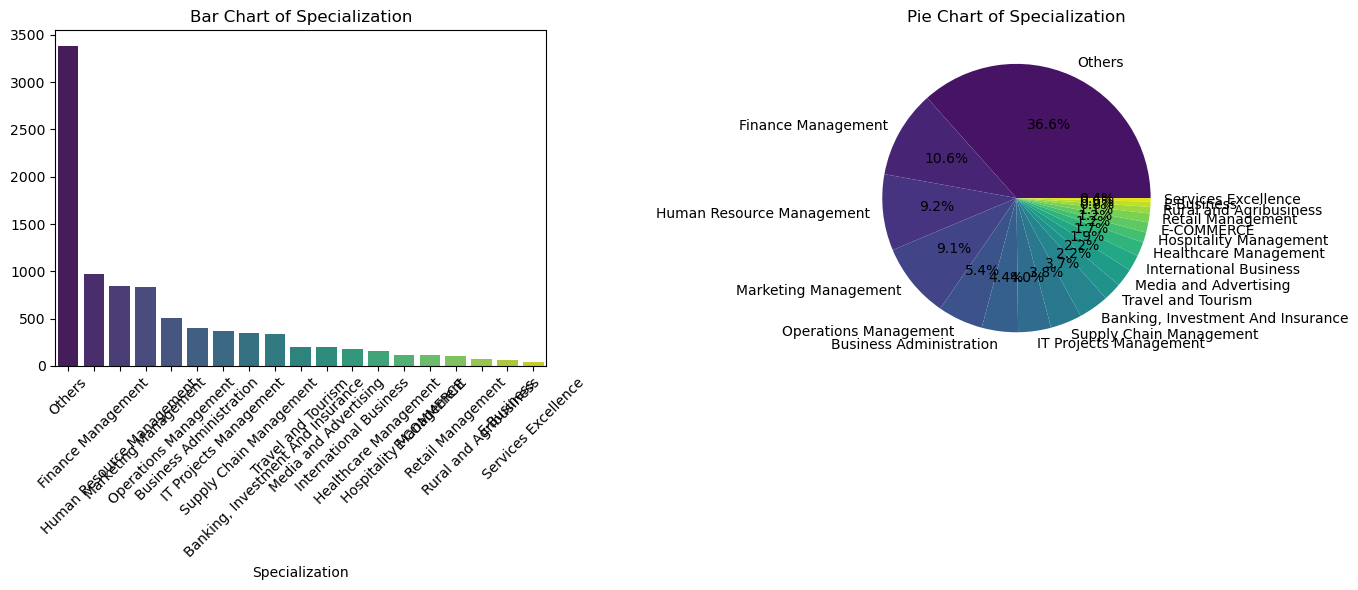

In [36]:
plot_categorical_distributions('Specialization')

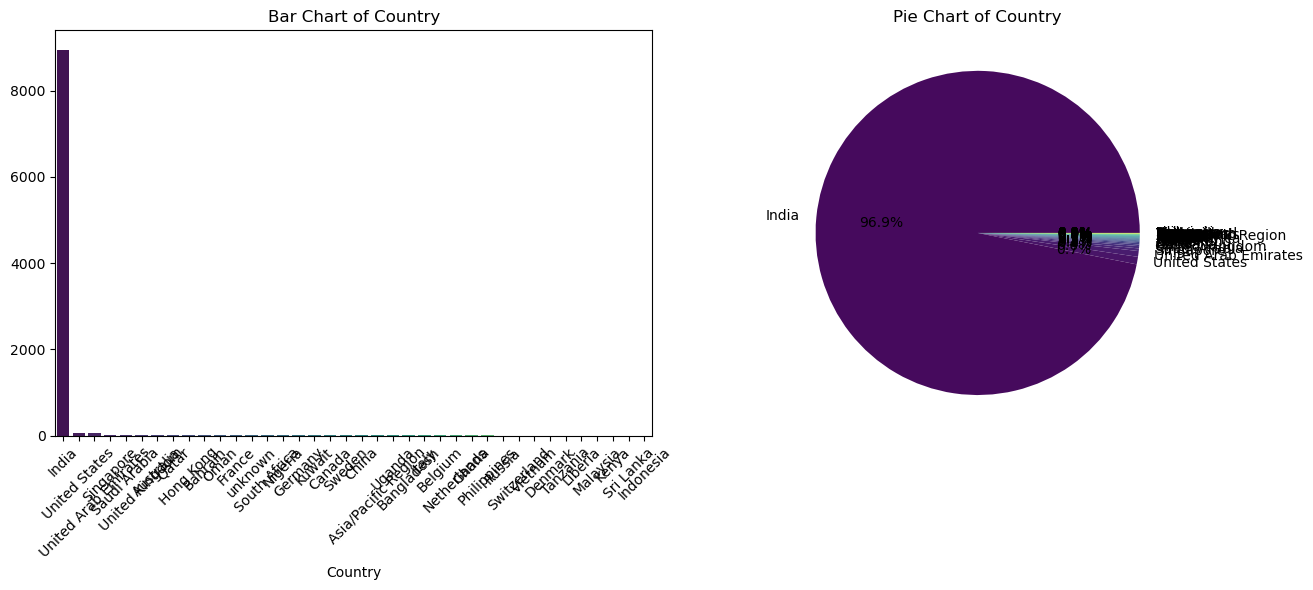

In [37]:
plot_categorical_distributions('Country')

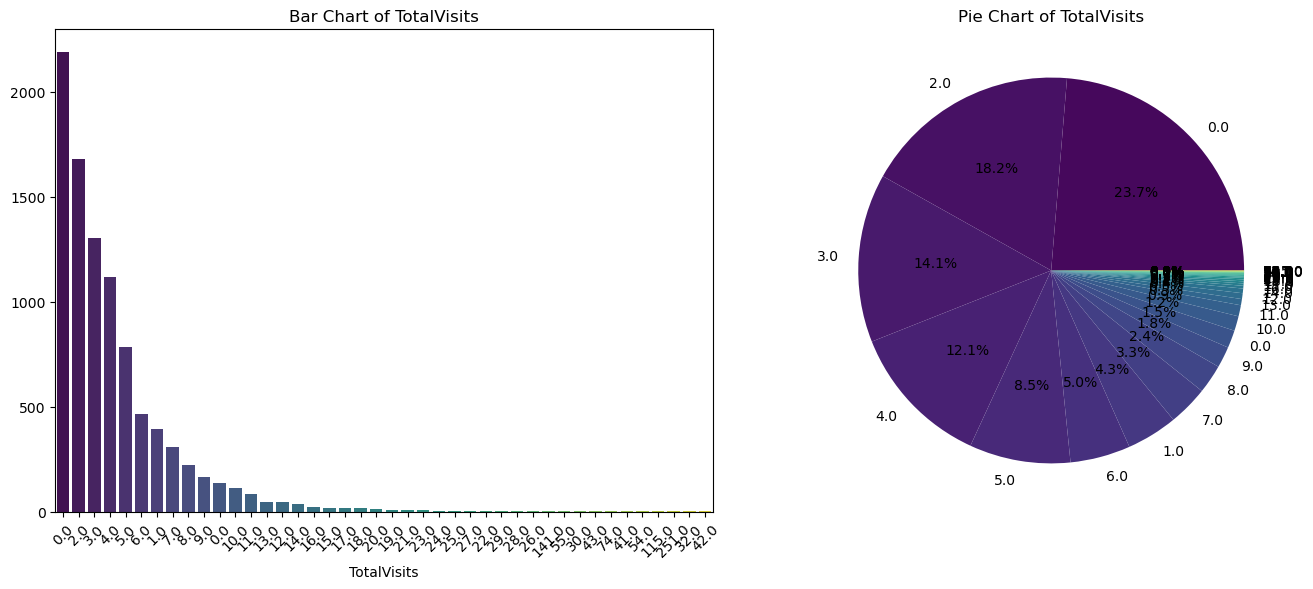

In [38]:
plot_categorical_distributions('TotalVisits')

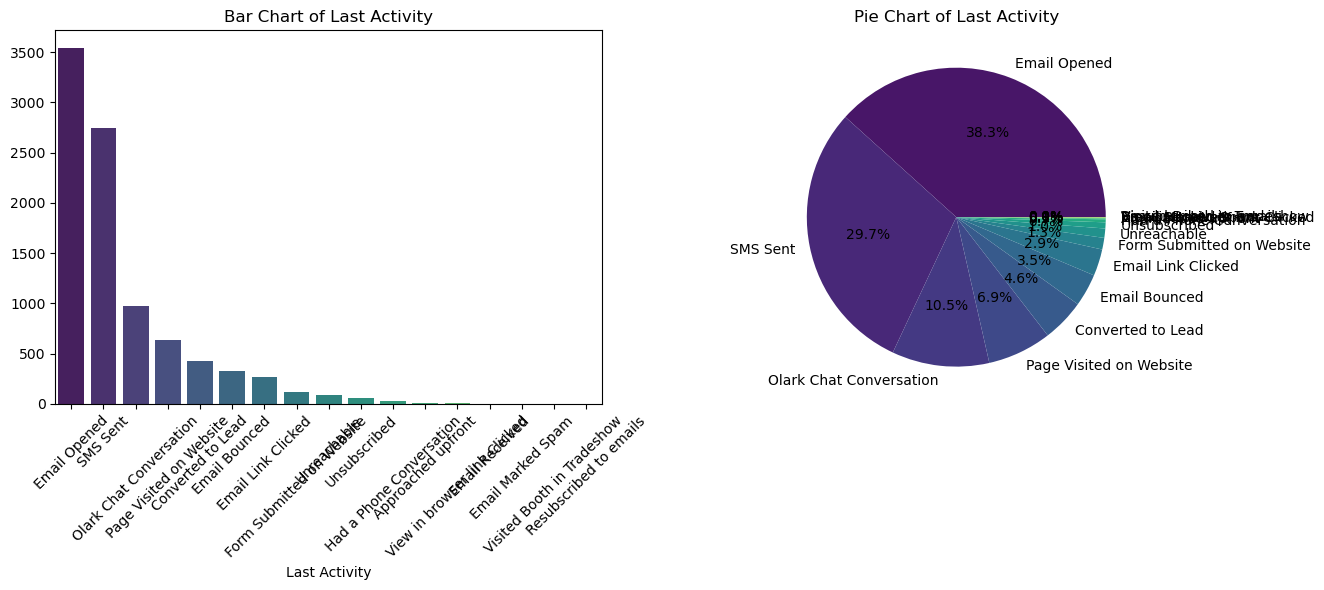

In [39]:
plot_categorical_distributions('Last Activity')

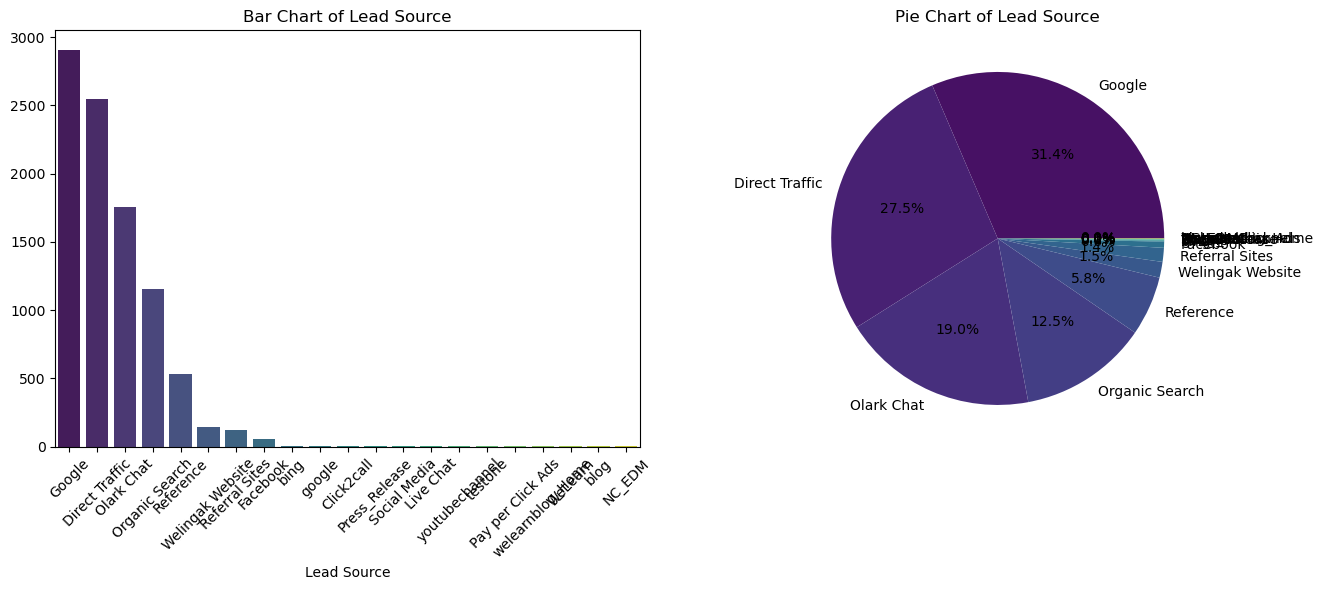

In [40]:
plot_categorical_distributions('Lead Source')

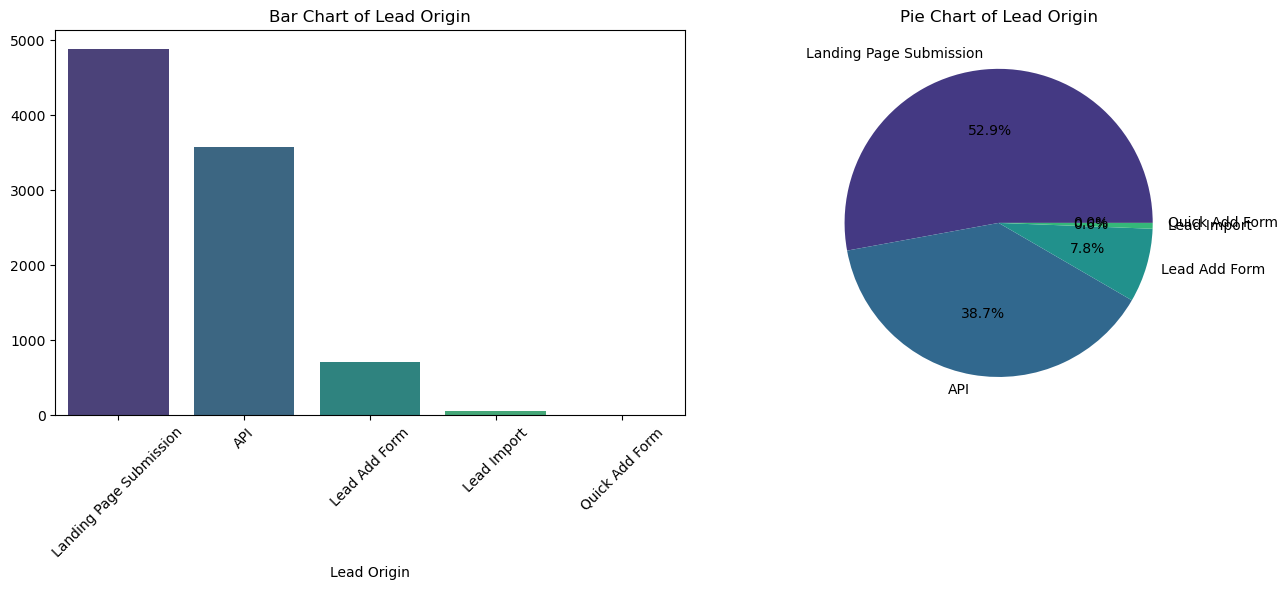

In [41]:
plot_categorical_distributions('Lead Origin')

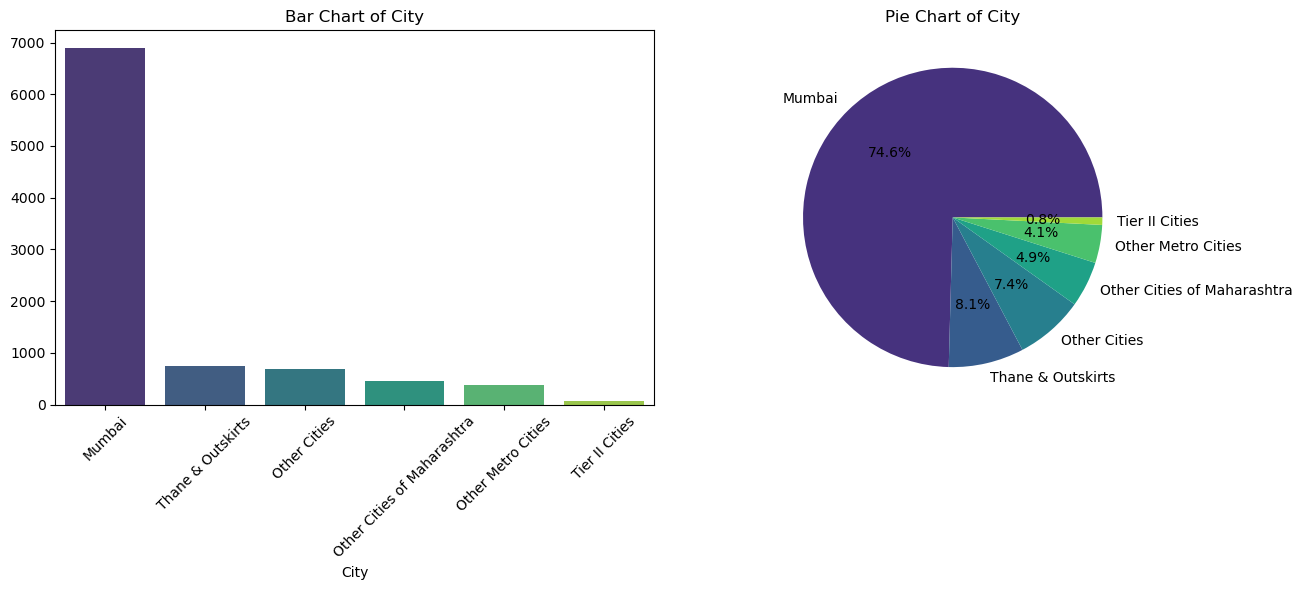

In [42]:
plot_categorical_distributions('City')

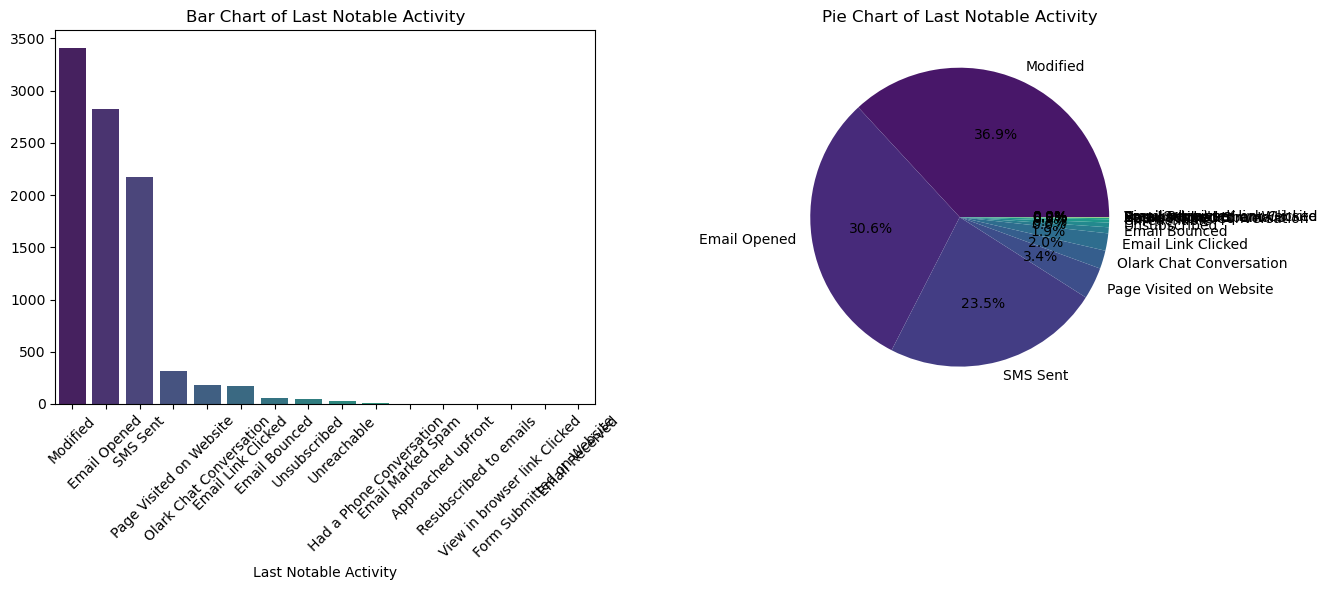

In [43]:
plot_categorical_distributions('Last Notable Activity')

In [44]:
cat_yes_no = ['A free copy of Mastering The Interview', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Magazine', 'Search']
cat_yes_no

['A free copy of Mastering The Interview',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Through Recommendations',
 'Digital Advertisement',
 'Newspaper',
 'X Education Forums',
 'Newspaper Article',
 'Magazine',
 'Search']

In [45]:
def plot_pie_charts(columns):
    num_columns = len(columns)
    num_cols = 4  # Number of columns in subplot grid
    num_rows = (num_columns + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(18, num_rows * 6))

    for i, column in enumerate(columns):
        plt.subplot(num_rows, num_cols, i + 1)
        value_counts = lead[column].value_counts()
        plt.pie(
            value_counts,
            labels=value_counts.index,
            autopct='%1.1f%%',
            colors=sns.color_palette('coolwarm', len(value_counts))
        )
        plt.title(f'Pie Chart of {column}')

    plt.tight_layout()
    plt.show()

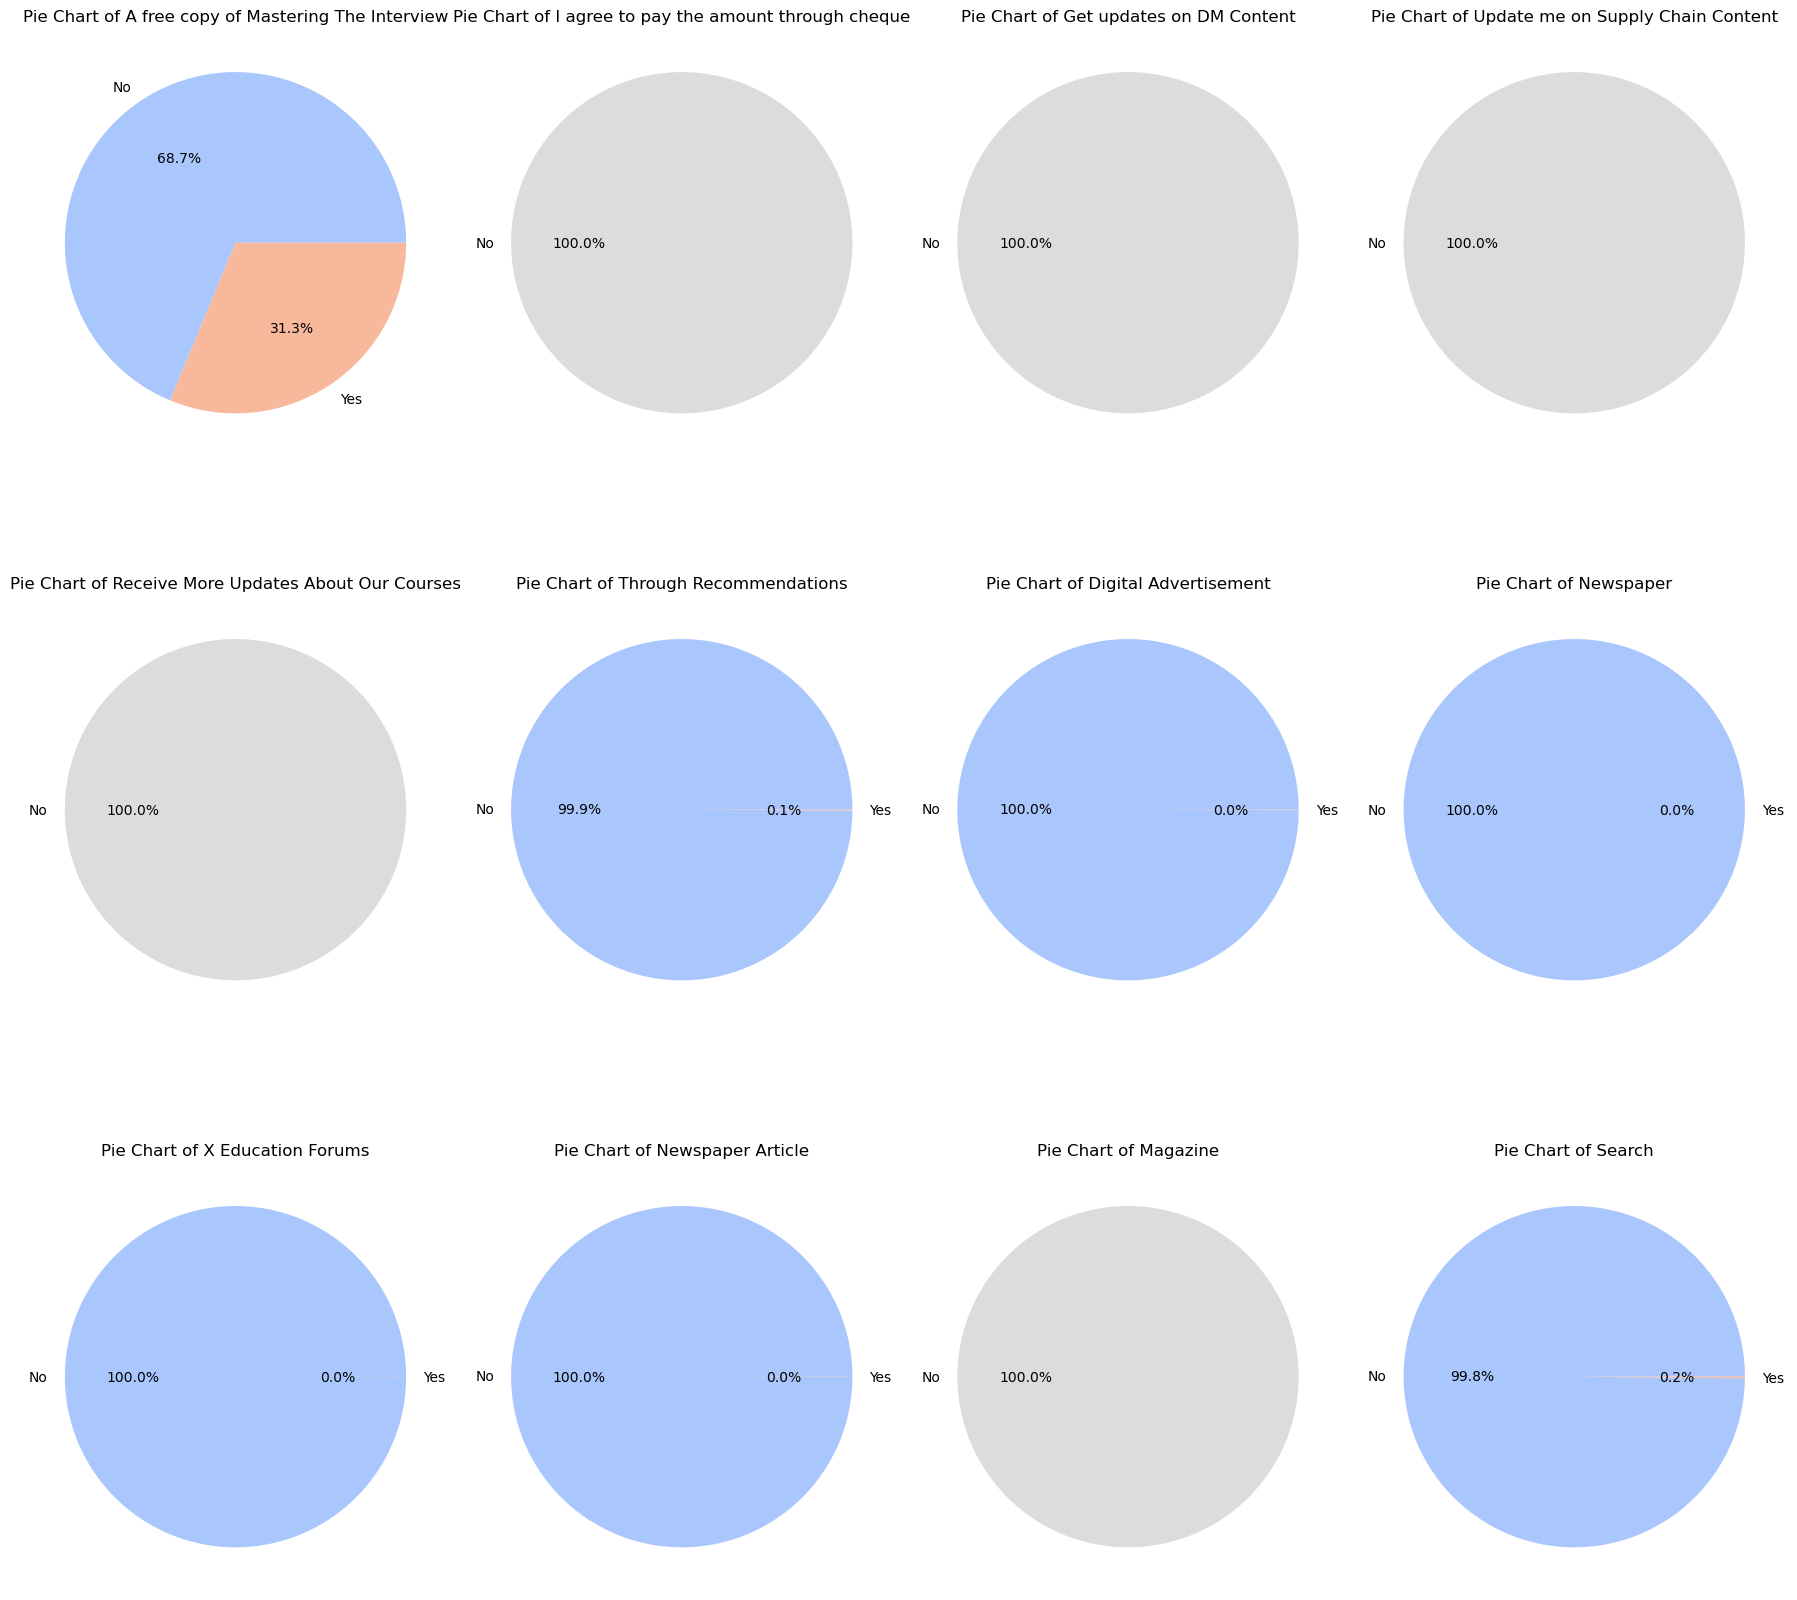

In [46]:
plot_pie_charts(cat_yes_no)

In [47]:
def plot_bar_charts(columns):
    num_columns = len(columns)
    num_cols = 4  # Number of columns in subplot grid
    num_rows = (num_columns + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(18, num_rows * 6))

    for i, column in enumerate(columns):
        plt.subplot(num_rows, num_cols, i + 1)
        value_counts = lead[column].value_counts()
        sns.barplot(
            x=value_counts.index, 
            y=value_counts.values, 
            palette='coolwarm'
        )
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

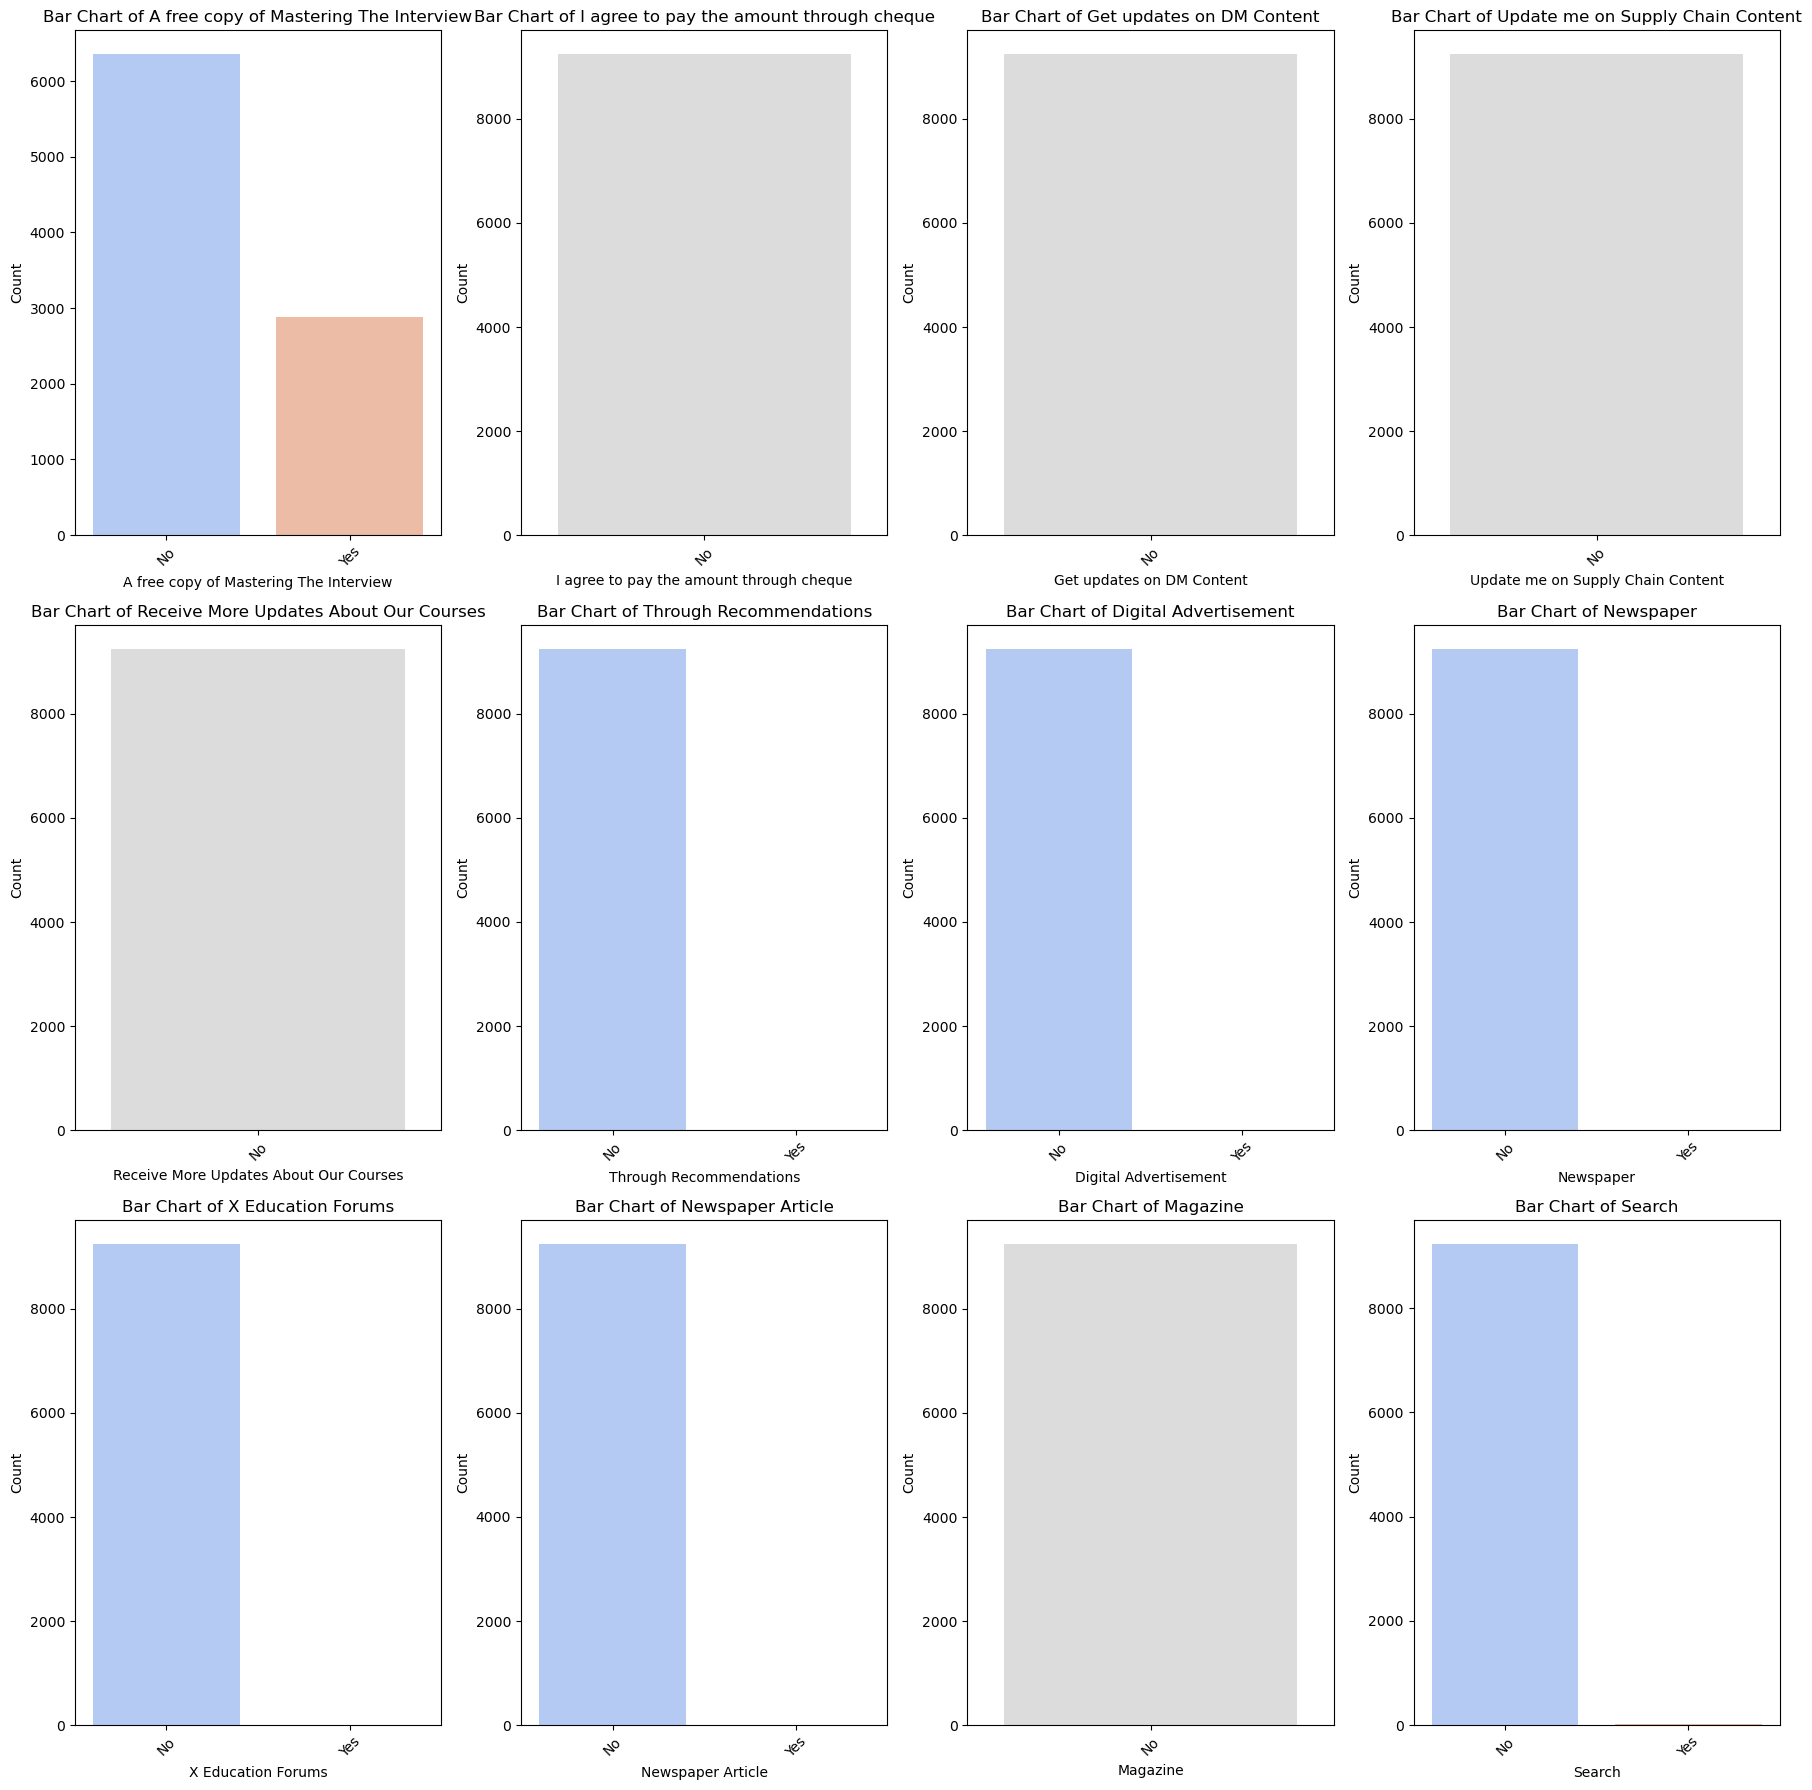

In [48]:
plot_bar_charts(cat_yes_no)

    INSIGHTS
        With respect to Categorical values i found some of the deatils and insights :
            - Data Distribution
            - Common Categories
            - Comparison Between Categories
            - Percentage Representation
            - Insights from Visualizations
            
        Work Done :: 
            Imputed and Deleted Null value Features and rows as per our need.
            Extracted Insights from the categorical values.
            
        Main Insights :
            -> The customers are basically from India (Mumbai), who are mostly unemployed and are hungry for jobs 
               or are job seekers. They are most interested in this facility. On the other hand, their specialization 
               may not be in the field we are providing, so they are mostly interested in switching their field.
               
            -> Mostly the customers fill data through online websites like GOOGLE and they are mostly connected 
               by the Email and more and are mostly interesed in the course and wants to know the leads.
            

In [49]:
lead.describe()

,Lead Number,Converted,Total Time Spent on Website
count,9240.00,9240.00,9240.00
mean,617188.44,0.39,487.70
std,23406.00,0.49,548.02
min,579533.00,0.00,0.00
25%,596484.50,0.00,12.00
50%,615479.00,0.00,248.00
75%,637387.25,1.00,936.00
max,660737.00,1.00,2272.00


In [50]:
print(lead['Converted'].value_counts())
print(round(lead['Converted'].value_counts(normalize=True),2) * 100)

Converted
0    5679
1    3561
Name: count, dtype: int64
Converted
0   61.00
1   39.00
Name: proportion, dtype: float64


    So 60% Customers are agreed and 40% are not the ratio is most to give about the data
    and well the customers are satisfid.
    
    As already clarified by the Categorical we can go with the numeric features also.

In [51]:
def numeric_plot(continuous_col) :
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=lead, x='Converted', y=continuous_col, palette='viridis')
    plt.title(f'Box Plot of {continuous_col} by Converted')
    plt.xlabel('Converted')
    plt.ylabel(continuous_col)
    
    g = sns.FacetGrid(lead, col='Converted', col_wrap=4, height=4, aspect=1.5)
    g.map(sns.histplot, continuous_col, kde=True, color='blue')
    g.set_axis_labels(continuous_col, 'Count')
    g.set_titles(col_template='{col_name}')
    plt.show()

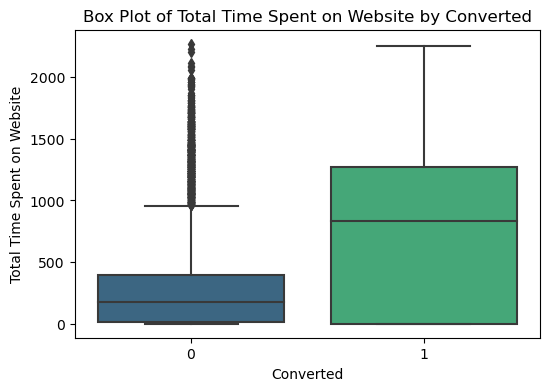

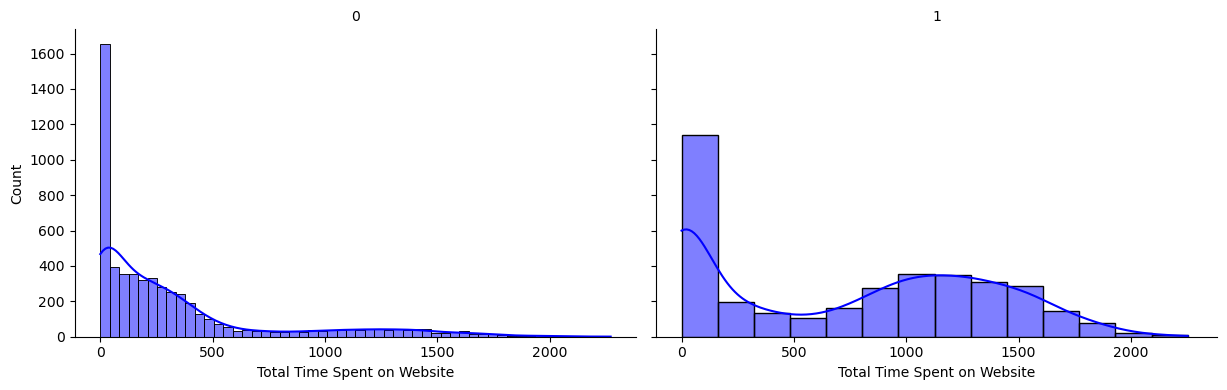

In [52]:
numeric_plot('Total Time Spent on Website')

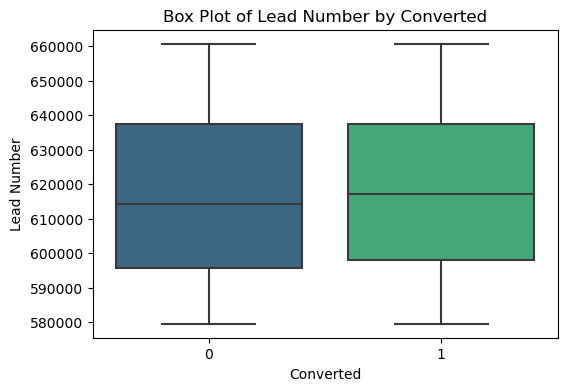

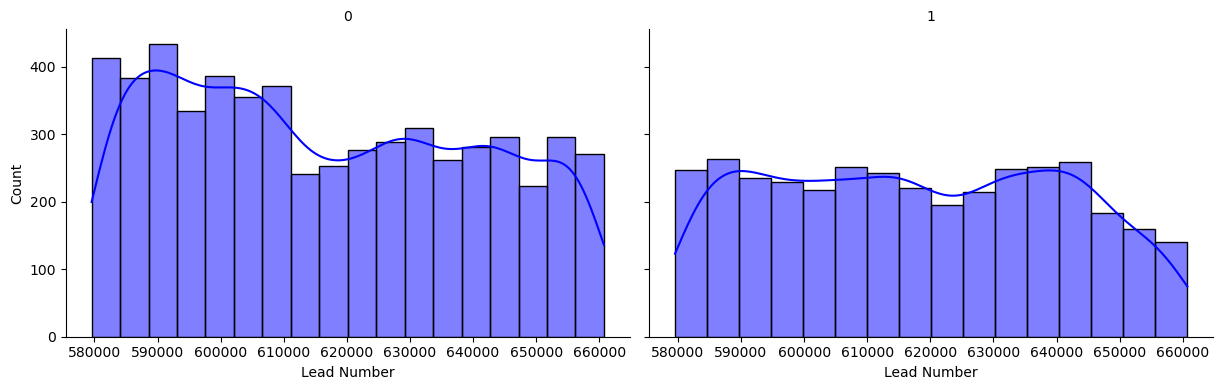

In [53]:
numeric_plot('Lead Number')

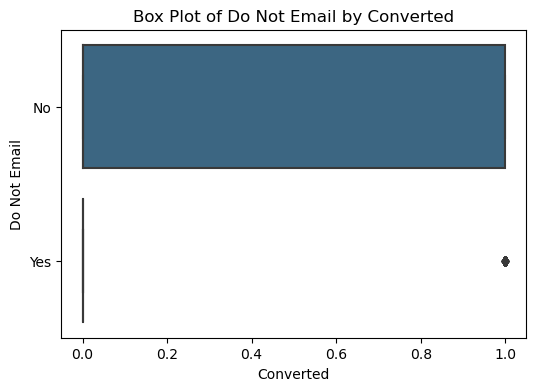

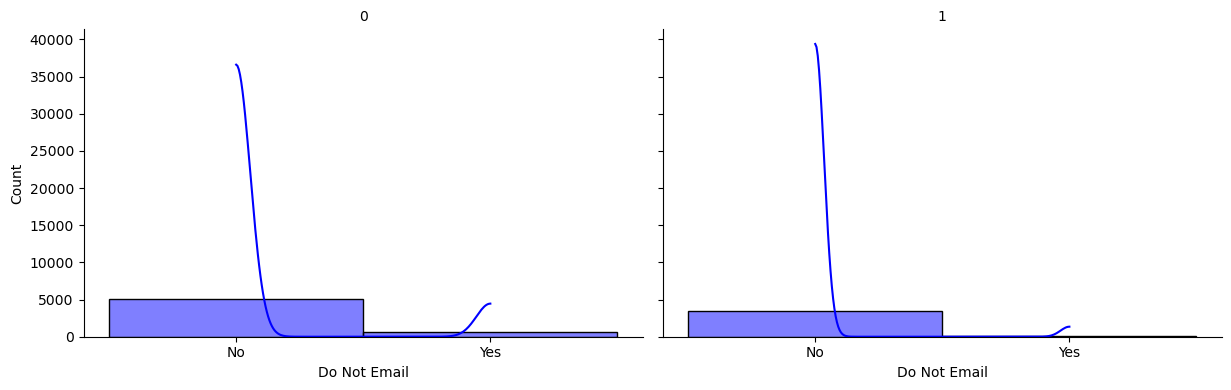

In [54]:
numeric_plot('Do Not Email')

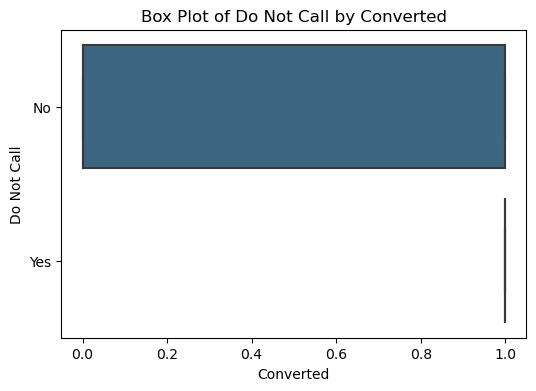

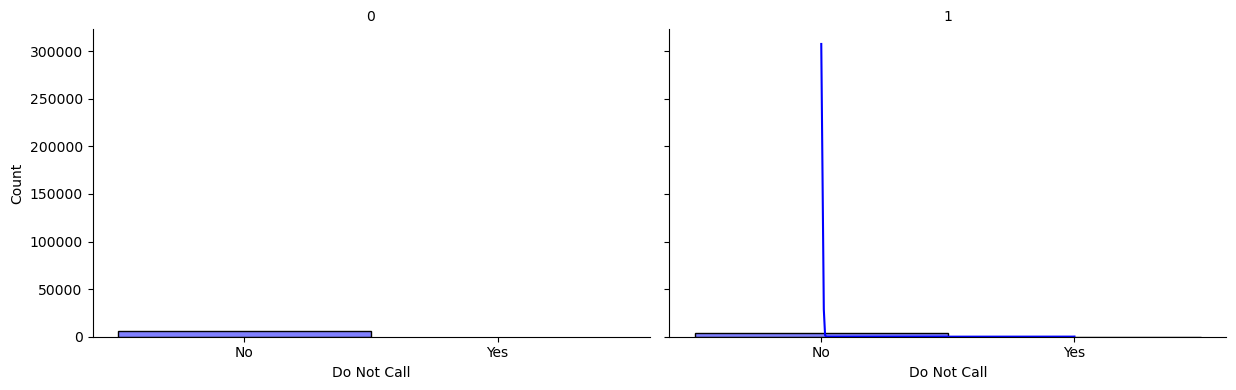

In [55]:
numeric_plot('Do Not Call')

    INSIGHTS we got!
    
        As in numerical columna we got that the customers visits the page are most likely interestd 
        for purchasing the cource,

<Figure size 1000x1000 with 0 Axes>

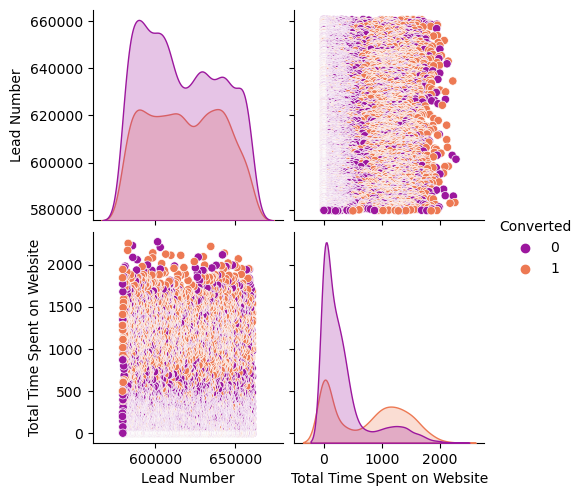

In [56]:
plt.figure(figsize = [10, 10])
sns.pairplot(lead, hue = 'Converted', palette = 'plasma')
plt.show()

##### Data Preprocessing

    Now we have to do Preprocessing where we have to understand and keep the reqired features and on the other hand 
    we have to to do feature selection also :
        Works to do ::.
            
            - Feature Understanding and Selection 
            - Feature Selection which is relevent to our target variable or have some dependendencies.
            - Have to Create Dummy variable so that machine can read the data set  
                    --  As we know ML requires the dataset in Numbers
            - Concactinating the the actual features with dummy variable.
            - Have to spilt for model preparation.

In [57]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
for col in lead.columns :
    if lead[col].dtype == object:
        print(lead[col].value_counts())
        print(50*'_')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__________________________________________________
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites    

In [59]:
print(round(lead['Specialization'].value_counts(normalize = True),2) * 100)
print(round(lead['What is your current occupation'].value_counts(normalize = True),2) * 100)
print(round(lead['Last Activity'].value_counts(normalize = True),2) * 100)
print(round(lead['Lead Source'].value_counts(normalize = True),2) * 100)
print(round(lead['Lead Origin'].value_counts(normalize = True),2) * 100)

Specialization
Others                              37.00
Finance Management                  11.00
Human Resource Management            9.00
Marketing Management                 9.00
Operations Management                5.00
Business Administration              4.00
IT Projects Management               4.00
Supply Chain Management              4.00
Banking, Investment And Insurance    4.00
Travel and Tourism                   2.00
Media and Advertising                2.00
International Business               2.00
Healthcare Management                2.00
Hospitality Management               1.00
E-COMMERCE                           1.00
Retail Management                    1.00
Rural and Agribusiness               1.00
E-Business                           1.00
Services Excellence                  0.00
Name: proportion, dtype: float64
What is your current occupation
Unemployed             90.00
Working Professional    8.00
Student                 2.00
Other                   0.00
Housew

    And this files are useful so am not removing it as they are related to the conversion of lead.

In [60]:
print(round(lead['Page Views Per Visit'].value_counts(normalize = True),2) * 100)
print(round(lead['TotalVisits'].value_counts(normalize = True),2) * 100)
print(round(lead['Prospect ID'].value_counts(normalize = True),2) * 100)

Page Views Per Visit
0.00   24.00
2.00   19.00
3.00   13.00
4.00   10.00
1.00    7.00
        ... 
2.56    0.00
6.33    0.00
1.64    0.00
8.21    0.00
2.08    0.00
Name: proportion, Length: 115, dtype: float64
TotalVisits
0.0     24.00
2.0     18.00
3.0     14.00
4.0     12.00
5.0      8.00
6.0      5.00
1.0      4.00
7.0      3.00
8.0      2.00
9.0      2.00
0.0      1.00
10.0     1.00
11.0     1.00
13.0     1.00
12.0     0.00
14.0     0.00
16.0     0.00
15.0     0.00
17.0     0.00
18.0     0.00
20.0     0.00
19.0     0.00
21.0     0.00
23.0     0.00
24.0     0.00
25.0     0.00
27.0     0.00
22.0     0.00
29.0     0.00
28.0     0.00
26.0     0.00
141.0    0.00
55.0     0.00
30.0     0.00
43.0     0.00
74.0     0.00
41.0     0.00
54.0     0.00
115.0    0.00
251.0    0.00
32.0     0.00
42.0     0.00
Name: proportion, dtype: float64
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620   0.00
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea   0.00
46befc49-253a-419b-abea-2fd978d2e2b1   0.00
9d35a2c2-09d8

    AS Prospect ID are not so much relatable for our model so am 
    dropping them also for better predection.

In [61]:
lead.drop('Prospect ID', inplace = True, axis = 1)

In [62]:
print(round(lead['Tags'].value_counts(normalize = True),2) * 100)

Tags
Will revert after reading the email                 59.00
Ringing                                             13.00
Interested in other courses                          6.00
Already a student                                    5.00
Closed by Horizzon                                   4.00
switched off                                         3.00
Busy                                                 2.00
Lost to EINS                                         2.00
Not doing further education                          2.00
Interested  in full time MBA                         1.00
Graduation in progress                               1.00
invalid number                                       1.00
Diploma holder (Not Eligible)                        1.00
wrong number given                                   1.00
opp hangup                                           0.00
number not provided                                  0.00
in touch with EINS                                   0.00
Lost to O

    Tags can be much important for us.

In [63]:
print(round(lead['Search'].value_counts(normalize = True),2) * 100)
print(round(lead['Magazine'].value_counts(normalize = True),2) * 100)
print(round(lead['Newspaper Article'].value_counts(normalize = True),2) * 100)
print(round(lead['X Education Forums'].value_counts(normalize = True),2) * 100)
print(round(lead['Newspaper'].value_counts(normalize = True),2) * 100)
print(round(lead['Digital Advertisement'].value_counts(normalize = True),2) * 100)
print(round(lead['Through Recommendations'].value_counts(normalize = True),2) * 100)
print(round(lead['Receive More Updates About Our Courses'].value_counts(normalize = True),2) * 100)
print(round(lead['Update me on Supply Chain Content'].value_counts(normalize = True),2) * 100)
print(round(lead['Get updates on DM Content'].value_counts(normalize = True),2) * 100)

Search
No    100.00
Yes     0.00
Name: proportion, dtype: float64
Magazine
No   100.00
Name: proportion, dtype: float64
Newspaper Article
No    100.00
Yes     0.00
Name: proportion, dtype: float64
X Education Forums
No    100.00
Yes     0.00
Name: proportion, dtype: float64
Newspaper
No    100.00
Yes     0.00
Name: proportion, dtype: float64
Digital Advertisement
No    100.00
Yes     0.00
Name: proportion, dtype: float64
Through Recommendations
No    100.00
Yes     0.00
Name: proportion, dtype: float64
Receive More Updates About Our Courses
No   100.00
Name: proportion, dtype: float64
Update me on Supply Chain Content
No   100.00
Name: proportion, dtype: float64
Get updates on DM Content
No   100.00
Name: proportion, dtype: float64


    As this columns or features :
        ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
    'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
    'Get updates on DM Content']
        
    are also some features which are classified in binary dataset and are mostly imbalanced or one of the value 
    isn't given so am removing this too.    

In [64]:
imbalance = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content']
lead.drop(imbalance, axis = 1, inplace = True)

In [65]:
print(round(lead['City'].value_counts(normalize = True),2) * 100)
print(round(lead['Country'].value_counts(normalize = True),2) * 100)

City
Mumbai                        75.00
Thane & Outskirts              8.00
Other Cities                   7.00
Other Cities of Maharashtra    5.00
Other Metro Cities             4.00
Tier II Cities                 1.00
Name: proportion, dtype: float64
Country
India                  97.00
United States           1.00
United Arab Emirates    1.00
Singapore               0.00
Saudi Arabia            0.00
United Kingdom          0.00
Australia               0.00
Qatar                   0.00
Hong Kong               0.00
Bahrain                 0.00
Oman                    0.00
France                  0.00
unknown                 0.00
South Africa            0.00
Nigeria                 0.00
Germany                 0.00
Kuwait                  0.00
Canada                  0.00
Sweden                  0.00
China                   0.00
Asia/Pacific Region     0.00
Uganda                  0.00
Bangladesh              0.00
Italy                   0.00
Belgium                 0.00
Netherlands  

    In country more than data is of India so the column isn't useful at all or can say that imbalanced data 
    is given.

In [66]:
lead.drop('Country', axis = 1, inplace = True)

In [67]:
print(round(lead['I agree to pay the amount through cheque'].value_counts(normalize = True),2) * 100)

I agree to pay the amount through cheque
No   100.00
Name: proportion, dtype: float64


    Now the column  ['agree to pay the amount through cheque'] a are in binary form and are not so considered with the target they releted to finance so just removing this also, and last for Last Notable Activity.

In [68]:
lead.drop('I agree to pay the amount through cheque', axis = 1, inplace = True)

In [69]:
round(lead['Last Notable Activity'].value_counts(normalize = True),2) * 100

Last Notable Activity
Modified                       37.00
Email Opened                   31.00
SMS Sent                       24.00
Page Visited on Website         3.00
Olark Chat Conversation         2.00
Email Link Clicked              2.00
Email Bounced                   1.00
Unsubscribed                    1.00
Unreachable                     0.00
Had a Phone Conversation        0.00
Email Marked Spam               0.00
Approached upfront              0.00
Resubscribed to emails          0.00
View in browser link Clicked    0.00
Form Submitted on Website       0.00
Email Received                  0.00
Name: proportion, dtype: float64

    This column is be useful with the target column.

In [70]:
lead['Lead Number'].value_counts()

Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64

In [71]:
lead.drop('Lead Number', axis = 1, inplace = True)

    Lead Number is working as the row no so removing this too...

##### Preprocessing.

In [72]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [74]:
lead.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Do Not Call                               object
Converted                                  int64
TotalVisits                               object
Total Time Spent on Website                int64
Page Views Per Visit                      object
Last Activity                             object
Specialization                            object
What is your current occupation           object
Tags                                      object
City                                      object
A free copy of Mastering The Interview    object
Last Notable Activity                     object
dtype: object

In [75]:
df_dumm = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','TotalVisits', 
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype=int)

In [76]:
lead.drop(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','TotalVisits', 
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], axis = 1, inplace = True)

In [77]:
lead = pd.concat([df_dumm, lead], axis = 1)

In [78]:
lead.dtypes

Lead Origin_Landing Page Submission                   int32
Lead Origin_Lead Add Form                             int32
Lead Origin_Lead Import                               int32
Lead Origin_Quick Add Form                            int32
Lead Source_Direct Traffic                            int32
                                                      ...  
Last Notable Activity_Unreachable                     int32
Last Notable Activity_Unsubscribed                    int32
Last Notable Activity_View in browser link Clicked    int32
Converted                                             int64
Total Time Spent on Website                           int64
Length: 268, dtype: object

In [79]:
lead.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat',
       ...
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked', 'Converted',
       'Total Time Spent on Website'],
      dtype='object', length=268)

In [80]:
# Trasnforming Dependent and independent values.
df_x = lead.drop(columns = 'Converted')
df_y = lead['Converted']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 15)

In [82]:
model = LogisticRegression()
model.fit(
    x_train,
    y_train
)
model

LogisticRegression()

In [83]:
y_train_pred = model.predict(x_train)

In [84]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.8902867965367965
Value of confusion_matrix :  [[4198  322]
 [ 489 2383]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.90      0.93      0.91      4520
           1       0.88      0.83      0.85      2872

    accuracy                           0.89      7392
   macro avg       0.89      0.88      0.88      7392
weighted avg       0.89      0.89      0.89      7392



In [85]:
y_test_pred = model.predict(x_test)

In [86]:
print("Value of accuracy_score : ", accuracy_score(y_test, y_test_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_test, y_test_pred))
print("Value of classification_report : ", classification_report(y_test, y_test_pred))

Value of accuracy_score :  0.8863636363636364
Value of confusion_matrix :  [[1070   89]
 [ 121  568]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.90      0.92      0.91      1159
           1       0.86      0.82      0.84       689

    accuracy                           0.89      1848
   macro avg       0.88      0.87      0.88      1848
weighted avg       0.89      0.89      0.89      1848

